In [1]:
%cd ..
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import glob
from experiment.plot_results import *

/Users/abdulhannankanji/Documents/GitHub/seldonian-fairness


# Plot comparison - long run with powell

{'name': 'logreg_small_n_nostrat_2', 'N': [312.42424242, 362.82828283, 413.23232323, 463.63636364, 514.04040404, 564.44444444, 614.84848485, 665.25252525, 715.65656566, 766.06060606, 816.46464646, 866.86868687, 917.27272727, 967.67676768, 1018.08080808, 1068.48484848, 1118.88888889, 1169.29292929, 1219.6969697, 1270.1010101, 1320.50505051, 1370.90909091, 1421.31313131, 1471.71717172, 1522.12121212, 1572.52525253, 1622.92929293, 1673.33333333, 1723.73737374, 1774.14141414, 1824.54545455, 1874.94949495, 1925.35353535, 1975.75757576, 2026.16161616, 2076.56565657, 2126.96969697, 2177.37373737, 2227.77777778, 2278.18181818, 2328.58585859, 2378.98989899, 2429.39393939, 2479.7979798, 2530.2020202, 2580.60606061, 2631.01010101, 2681.41414141, 2731.81818182, 2782.22222222, 2832.62626263, 2883.03030303, 2933.43434343, 2983.83838384, 3034.24242424, 3084.64646465, 3135.05050505, 3185.45454545, 3235.85858586, 3286.26262626, 3336.66666667, 3387.07070707, 3437.47474747, 3487.87878788, 3538.28282828, 

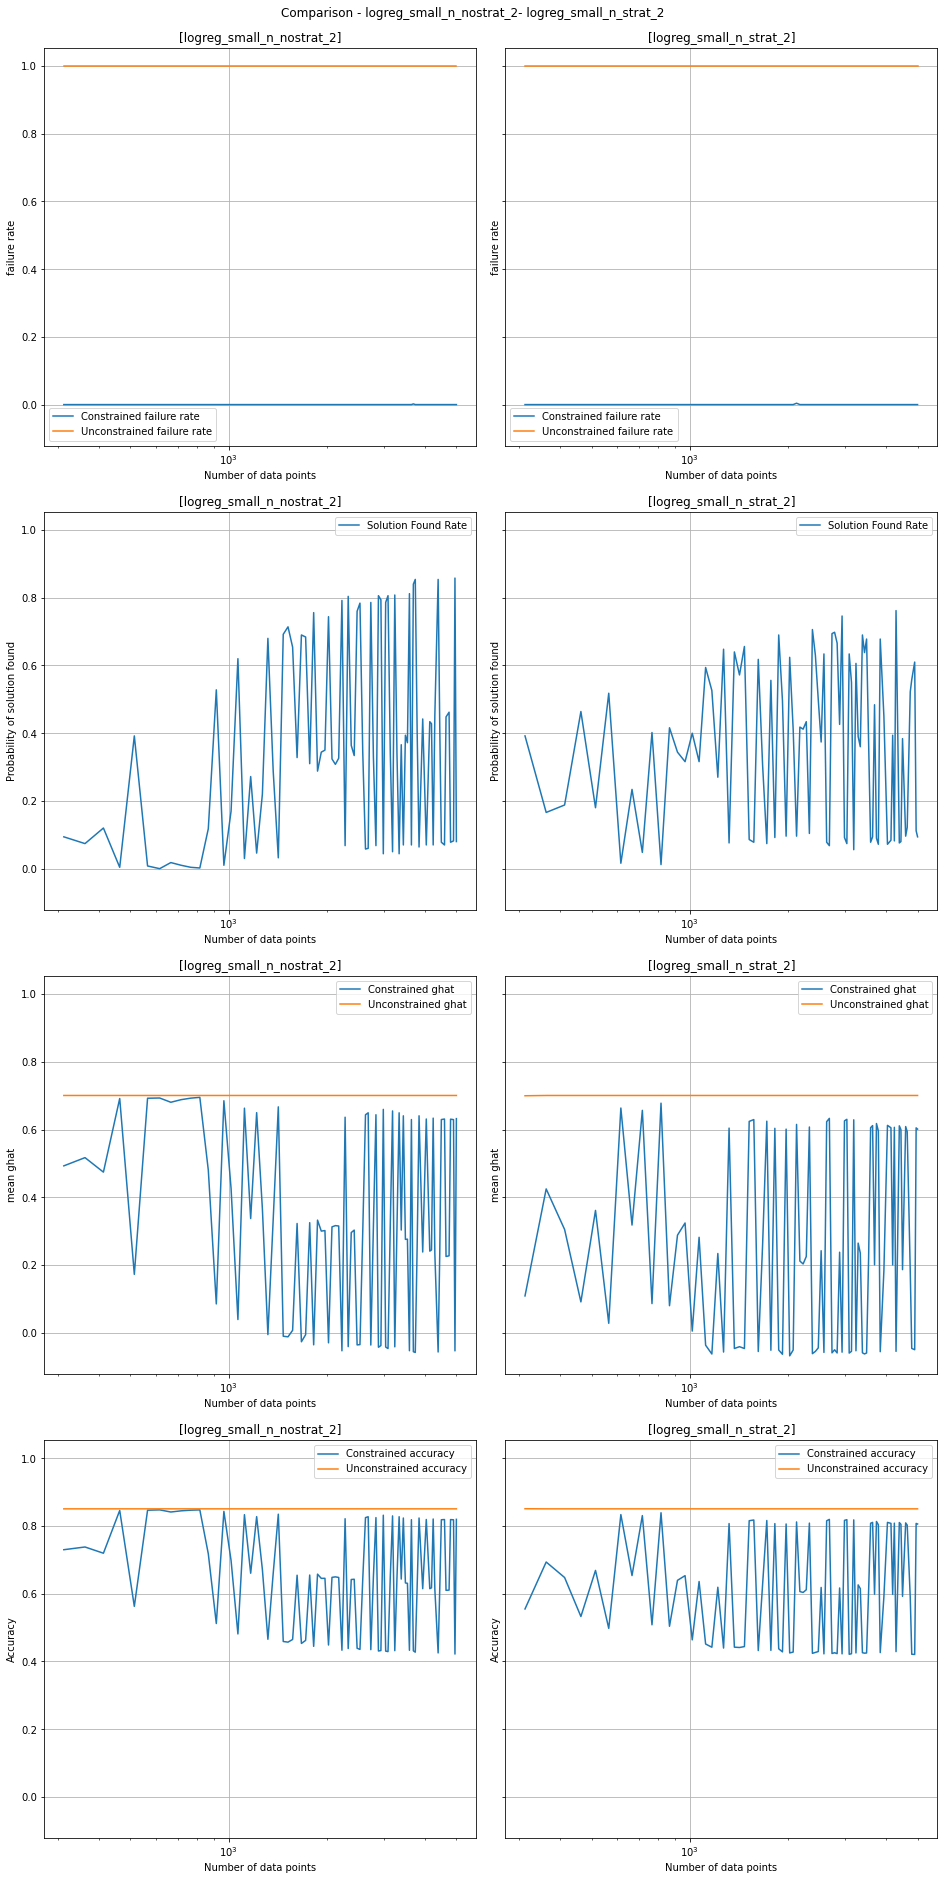

In [3]:
print_config=True
folders = ['result/result_logreg_small_n_nostrat_2','result/result_logreg_small_n_strat_2']
fig, axs = plt.subplots(4,len(folders), figsize=(13, int(13*4/len(folders))), sharey=True, gridspec_kw={'hspace':0.3},
                       constrained_layout=True)
axs = np.array(axs).reshape(4, len(folders))
figtitle = "Comparison "
for i in range(len(folders)):
    config = pickle.load(open(folders[i] + "/config.p", "rb"))
    if print_config:
        print(config)
    exps = pickle.load(open(folders[i] + "/exps.p", "rb"))
    res = pickle.load(open(list(glob.glob(folders[i] + '/final_res*.p'))[0], 'rb'))
    plot_results(res, config['name'], axs = axs[:,i], errorbars=False)
    figtitle+= f"- {config['name']}"
fig.suptitle(figtitle)
plt.show()

# Plot comparison - long run with CMAES

{'name': 'logreg_small_cmaes_nostrat', 'N': [200, 452.63157895, 705.26315789, 957.89473684, 1210.52631579, 1463.15789474, 1715.78947368, 1968.42105263, 2221.05263158, 2473.68421053, 2726.31578947, 2978.94736842, 3231.57894737, 3484.21052632, 3736.84210526, 3989.47368421, 4242.10526316, 4494.73684211, 4747.36842105, 5000], 'trials': 1000, 'method': 'ttest', 'D': 5, 'tprs': [0.2, 0.9], 'test_size': 0.4, 'opt': 'CMAES', 'stratify': False, 'hard_barrier': True, 'thetas': 10, 'thresh': 0.2}
{'name': 'logreg_small_cmaes_strat', 'N': [200, 452.63157895, 705.26315789, 957.89473684, 1210.52631579, 1463.15789474, 1715.78947368, 1968.42105263, 2221.05263158, 2473.68421053, 2726.31578947, 2978.94736842, 3231.57894737, 3484.21052632, 3736.84210526, 3989.47368421, 4242.10526316, 4494.73684211, 4747.36842105, 5000], 'trials': 1000, 'method': 'ttest', 'D': 5, 'tprs': [0.2, 0.9], 'test_size': 0.4, 'opt': 'CMAES', 'stratify': True, 'hard_barrier': True, 'thetas': 10, 'thresh': 0.2}


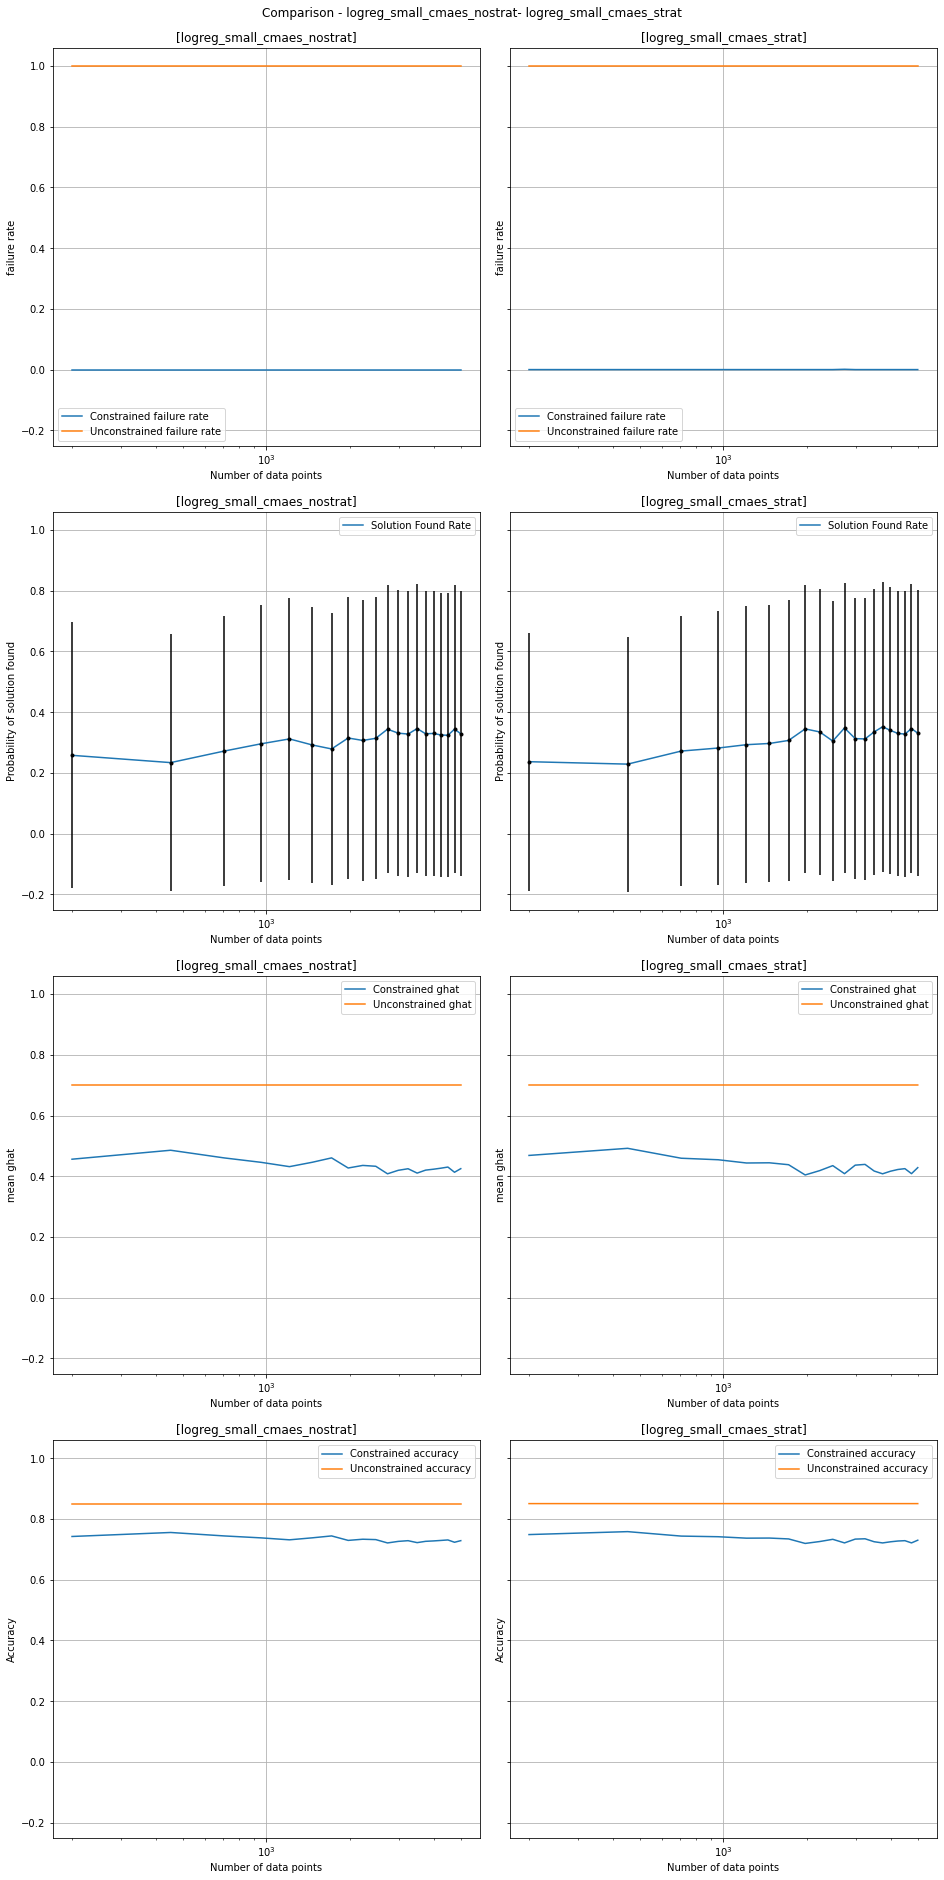

In [6]:
print_config=True
folders = ['result/result_logreg_small_cmaes_nostrat', 'result/result_logreg_small_cmaes_strat']
fig, axs = plt.subplots(4,len(folders), figsize=(13, int(13*4/len(folders))), sharey=True, gridspec_kw={'hspace':0.3},
                       constrained_layout=True)
axs = np.array(axs).reshape(4, len(folders))
ress = {}
figtitle = "Comparison "
for i in range(len(folders)):
    config = pickle.load(open(folders[i] + "/config.p", "rb"))
    if print_config:
        print(config)
    exps = pickle.load(open(folders[i] + "/exps.p", "rb"))
    res = pickle.load(open(list(glob.glob(folders[i] + '/final_res*.p'))[0], 'rb'))
    plot_results(res, config['name'], axs = axs[:,i], errorbars=True)
    figtitle+= f"- {config['name']}"
fig.suptitle(figtitle)
plt.show()

In [8]:
strat_res = pickle.load(open(list(glob.glob(folders[1] + '/final_res*.p'))[0], 'rb'))
nostrat_res = pickle.load(open(list(glob.glob(folders[0] + '/final_res*.p'))[0], 'rb'))

res_sfr = []
res_acc = []
res_fr = []
res_n = []

for (r_strat, r_nostrat) in zip(strat_res, nostrat_res):
    assert r_strat["N"] == r_nostrat['N']
    res_n.append(r_strat['N'])
    res_sfr.append(r_strat['sol_found_rate'] - r_nostrat['sol_found_rate'])
    res_acc.append(r_strat['accuracy'] - r_nostrat['accuracy'])
    res_fr.append(r_strat['failure_rate'] - r_nostrat['failure_rate'])

In [9]:
print(res_sfr)

[-0.02100000000000002, -0.0050000000000000044, 0.0, -0.014000000000000012, -0.019000000000000017, 0.0050000000000000044, 0.02799999999999997, 0.02999999999999997, 0.028000000000000025, -0.009000000000000008, 0.0040000000000000036, -0.018000000000000016, -0.016000000000000014, -0.010999999999999954, 0.022999999999999965, 0.010000000000000009, 0.0050000000000000044, 0.0040000000000000036, 0.0020000000000000018, 0.0020000000000000018]


In [10]:
print(res_acc)

[0.006285424999999845, 0.002787881499999867, -0.0005398303333332688, 0.003804291999999987, 0.005468014499999896, -0.0007833996666666287, -0.009896627833333338, -0.010015100499999985, -0.007583390833333259, 0.0009652671666667834, 0.00015128483333348708, 0.007537656166666684, 0.0062593866666667, 0.002961073666666647, -0.005276009333333387, -0.002872849666666788, -0.0019229954999998577, -0.002419063499999985, -0.0020456656666665296, 0.001502236666666712]


In [11]:
print(res_fr)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
